<a href="https://colab.research.google.com/github/UgyenDorji129/Hand-written-number-Detection/blob/main/CS64_MLLab_191452_191453.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Digit Classification**

**Import the required libary**

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt 
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

**Loading the dataset that is already present in the sklearn.**

In [ ]:
dataSet = datasets.load_digits()


In [ ]:
dataSetAttributes = dir(dataSet)
print("The attributes that are being stored in the datasets are: ", dataSetAttributes)

The attributes that are being stored in the datasets are:  ['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


**Note:** "images" attribute stores the pixel value and "target" attributes stores the class label associated

**Checking the dataset's data type**

In [ ]:
print("Data type for the input attributes: ",type(dataSet.images))
print("Data type for the input attributes: ",type(dataSet.target))

Data type for the input attributes:  <class 'numpy.ndarray'>
Data type for the input attributes:  <class 'numpy.ndarray'>


**Checking the shape of our datasets**

In [ ]:
sizeOfImage = dataSet.images.shape
sizeOfLabel = dataSet.target.shape

print("The shape of the image datasets: ", sizeOfImage)
print("The shape of the target datasets: ", sizeOfLabel)


The shape of the image datasets:  (1797, 8, 8)
The shape of the target datasets:  (1797,)


**Note:** 1797 is the total sample sizes, and 8 * 8 is the x and y coordinate of the image giving total pixel size of 64.

**Now let us look at how each image is stored.**

In [ ]:
print("Each image is stored as: ")
dataSet.images[0]

Each image is stored as: 


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

**To visualize the actual images**

In [ ]:
def showImage(seed):
  random.seed(seed)
  index = random.randint(0,len(dataSet.images))
  plt.figure(figsize=(5,5))
  plt.imshow(dataSet.images[index])
  plt.xlabel(dataSet.target[index],size=24)


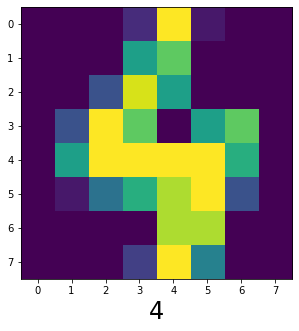

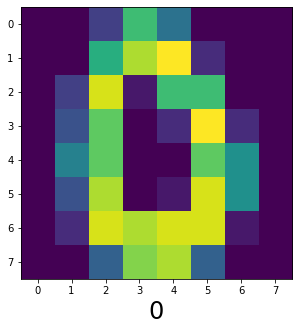

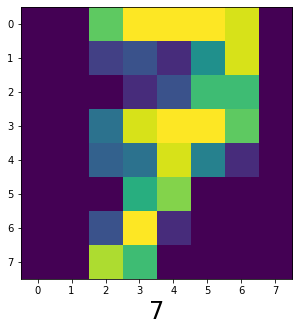

In [ ]:
showImage(2)
showImage(3)
showImage(5)

**Converting into 1-dimensional array because our images are 2D.**

In [ ]:
y_dataSet = dataSet.target
x_dataSet = dataSet.images.reshape(len(dataSet.images), -1)

sizeOfImage = x_dataSet.shape
sizeOfLabel = y_dataSet.shape

print("The shape of the image datasets: ", sizeOfImage)
print("The shape of the target datasets: ", sizeOfLabel)

The shape of the image datasets:  (1797, 64)
The shape of the target datasets:  (1797,)


**Data  Normalisation**

In [ ]:
minmax = MinMaxScaler()
x_dataSet = minmax.fit_transform(x_dataSet)
print("Data sets after performing normalisation: ")
print(x_dataSet[0])

Data sets after performing normalisation: 
[0.         0.         0.3125     0.8125     0.5625     0.0625
 0.         0.         0.         0.         0.8125     0.9375
 0.625      0.9375     0.3125     0.         0.         0.1875
 0.9375     0.125      0.         0.6875     0.5        0.
 0.         0.26666667 0.75       0.         0.         0.5
 0.53333333 0.         0.         0.35714286 0.5        0.
 0.         0.5625     0.57142857 0.         0.         0.25
 0.6875     0.         0.0625     0.75       0.4375     0.
 0.         0.125      0.875      0.3125     0.625      0.75
 0.         0.         0.         0.         0.375      0.8125
 0.625      0.         0.         0.        ]


**Splitting our Data sets into training and testing datasets**

In [ ]:
x_train = x_dataSet[:1000]
y_train = y_dataSet[:1000]

x_test = x_dataSet[1000:]
y_test = y_dataSet[1000:]

print("The size of train datasets: ",len(x_train))
print("The size of test datasets: ",len(x_test))

The size of train datasets:  1000
The size of test datasets:  797


**Building the KNN classifier model for value of k = 5**

In [ ]:
model1 = KNeighborsClassifier(n_neighbors=5)


**Training our model1 using train dataset**

In [ ]:
model1.fit(x_train, y_train)

KNeighborsClassifier()

**Testing of model using test dataset**

In [ ]:
y_predicted = model1.predict(x_test)
y_predicted == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

**Defining the function that classifies the image**

In [ ]:
def predict(index,model):
  y_pred = model.predict(x_test)
  plt.figure(figsize=(5,5))
  plt.imshow(np.reshape(x_test[index],(8,8)))
  plt.xlabel(y_pred[index],size=24)
  if(y_pred[index] == y_test[index]):
    plt.title("Image is classified correctly!")
  else:
    plt.title("Image is classified Incorrectly!")




**Classification of various images  from testing dataset**

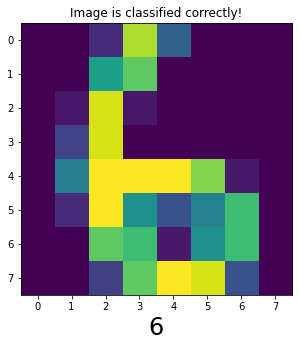

In [ ]:
predict(5,model1)


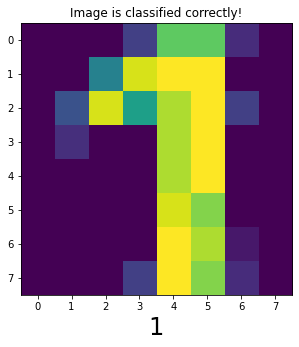

In [ ]:
predict(500,model1)

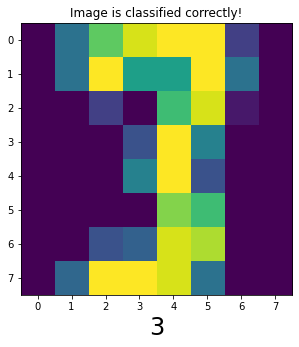

In [ ]:
predict(240,model1)

**Calculating the  accuracy of the model**

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_predicted)
print("Accuracy: ",accuracy * 100,"%")

Accuracy:  95.8594730238394 %


**Note:** We can try with  different values of k

**Building KNN classifier with k = 9**

In [ ]:
model2 = KNeighborsClassifier(n_neighbors=9)

**Training our model using training dataset**

In [ ]:
model2.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

**Testing our model  using test datasets**

In [ ]:
y_predicted = model2.predict(x_test)

**Calling our user defined function to visualise our model2**

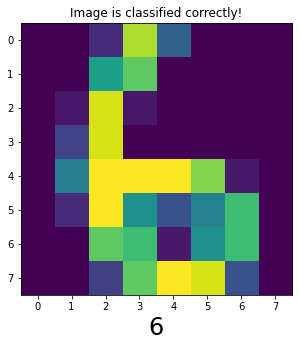

In [ ]:
predict(5,model2)

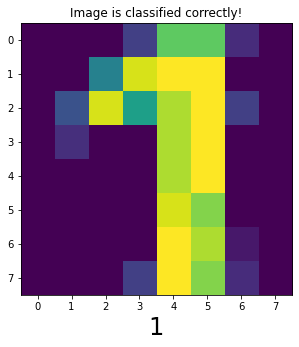

In [ ]:
predict(500,model2)

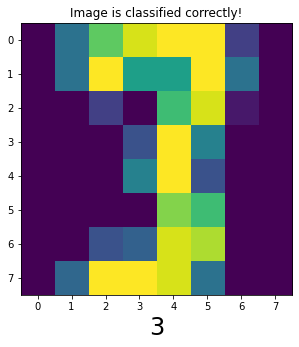

In [ ]:
predict(240,model2)

**Calculating the accuracy of the model2**

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_predicted)
print("Accuracy: ",accuracy * 100,"%")

Accuracy:  95.23212045169385 %


**Note:** The accuracy of our model2 has slightly decreased hence we will try to decrease the value of k

**Buliding another KNN classifier with K = 3**

In [ ]:
model3 = KNeighborsClassifier(n_neighbors=3)

**Training the model with testing datasets**

In [ ]:
model3.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**Testing model 3 using the testing dataset**

In [ ]:
y_predicted = model3.predict(x_test)

**Calling our user defined function to understand how model 3 is predicting**

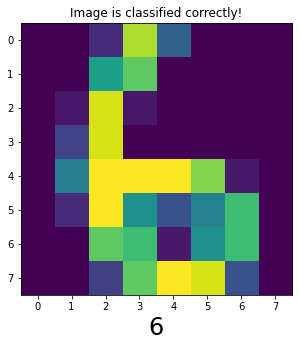

In [ ]:
predict(5,model3)

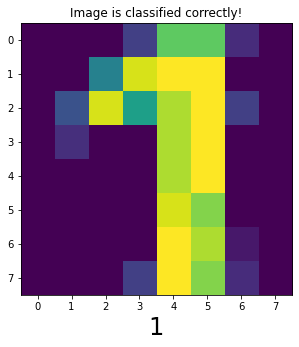

In [ ]:
predict(500,model3)

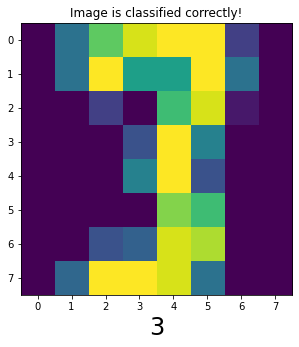

In [ ]:
predict(240,model3)

**Calculating the accuracy of model 3**

In [ ]:
print(x_test[0])

[0.         0.         0.0625     0.875      0.125      0.
 0.         0.         0.         0.         0.         1.
 0.3125     0.         0.         0.         0.         0.
 0.         0.875      0.625      0.         0.         0.
 0.         0.         0.         0.6875     1.         0.0625
 0.         0.         0.         0.         0.         0.1875
 0.875      0.375      0.         0.         0.         0.
 0.         0.         0.5        0.75       0.         0.
 0.         0.         0.625      0.875      0.8125     1.
 0.5        0.23076923 0.         0.         0.125      0.6875
 0.75       0.9375     1.         0.9375    ]


In [ ]:
accuracy = metrics.accuracy_score(y_test, y_predicted)
print("Accuracy: ",accuracy * 100,"%")

Accuracy:  96.23588456712673 %


**Note:** By comparing the three model we can conclude that our model best performed when the hyper-parameter value K = 3

**Saving our models**

In [ ]:
pip install sklite

In [ ]:
from  sklite import LazyExport
lazy = LazyExport(model3)
lazy.save("model.json")

/usr/local/lib/python3.7/dist-packages/sklite/lib/abstract.py:85: UserWarning: /root/.sklite has been created.
  warnings.warn(wrn)
